In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons
from data._util_data import add_noise

def make_moons_random_assignment(n_samples, n_swap=0, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=n_samples, random_state=seed, noise=0.0)
    # X, l = add_noise(X, l, 20, 0.1)
    class0 = np.where(l == 0)[0]
    class1 = np.where(l == 1)[0]
    choice_class0 = np.random.choice(len(class0), replace=False, size=n_samples // 100 * n_swap)
    choice_class1 = np.random.choice(len(class1), replace=False, size=n_samples // 100 * n_swap)
    l[class0[choice_class0]] = 1
    l[class1[choice_class1]] = 0
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
n_swaps = range(0, 26)
twoMoons_datasets = [
    [make_moons_random_assignment(500, n_swap=n_swap, seed=seed) for seed in random_seeds]
    for n_swap in n_swaps
]

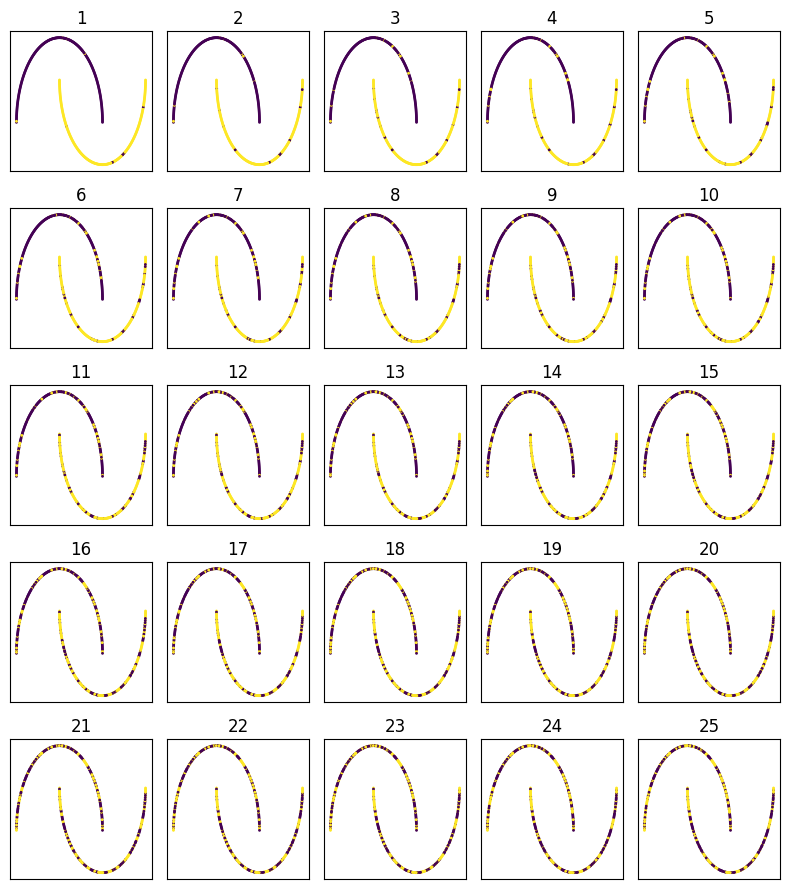

In [3]:
import matplotlib.pyplot as plt
from data._util_plots import plot_datasets

plot_datasets(twoMoons_datasets[1:], n_swaps[1:], rows=5, cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_nswap_data.png")

In [4]:
from data._util_experiments import cache, calc_eval_measures_for_multiple_datasets
from data._metrics import create_and_filter_df


eval_results = cache("TwoMoons_nswap", calc_eval_measures_for_multiple_datasets, [twoMoons_datasets, n_swaps])

df = create_and_filter_df(eval_results)

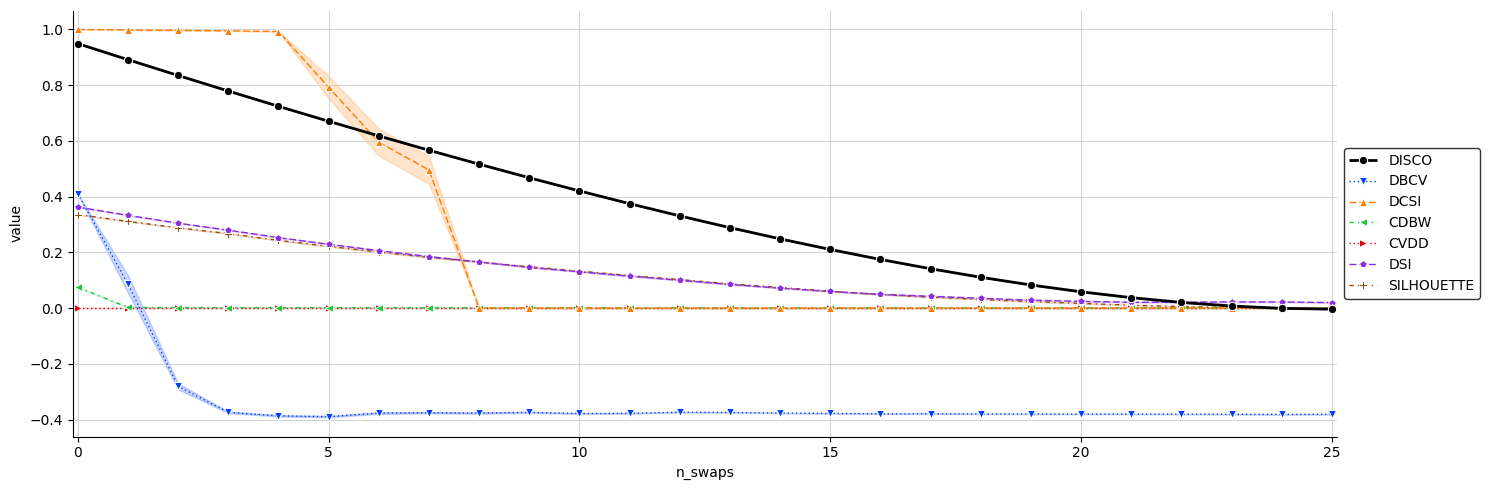

In [5]:
from data._util_plots import plot_lineplot

eps = 0.1
ymin, ymax = n_swaps[0] - eps, n_swaps[-1] + eps
df = df.rename(columns={"dataset": "n_swaps"})

plot_lineplot(df, "n_swaps", "value", "measure", x_range=(ymin, ymax), y_range=(None, None))
plt.savefig("imgs/TwoMoons_nswap.png")